Raw Data: [4.17 5.61 3.88 1.55 2.3  5.58 5.58 5.14 4.52 1.53 4.24 1.18 3.17 4.72
 2.17 2.17 3.94 0.95 1.48 5.68 4.25 3.66 2.12 1.24 3.64 8.44 5.2  2.33
 2.18 3.43]
Binned [0.95       1.34421053 1.73842105 2.13263158 2.52684211 2.92105263
 3.31526316 3.70947368 4.10368421 4.49789474 4.89210526 5.28631579
 5.68052632 6.07473684 6.46894737 6.86315789 7.25736842 7.65157895
 8.04578947 8.44      ]
counts:  [0.1        0.1        0.03333333 0.16666667 0.         0.03333333
 0.1        0.06666667 0.1        0.06666667 0.06666667 0.13333333
 0.         0.         0.         0.         0.         0.
 0.03333333]
edges [0.95       1.34421053 1.73842105 2.13263158 2.52684211 2.92105263
 3.31526316 3.70947368 4.10368421 4.49789474 4.89210526 5.28631579
 5.68052632 6.07473684 6.46894737 6.86315789 7.25736842 7.65157895
 8.04578947 8.44      ]
bins [0.95       1.34421053 1.73842105 2.13263158 2.52684211 2.92105263
 3.31526316 3.70947368 4.10368421 4.49789474 4.89210526 5.28631579
 5.68052632 6.07473

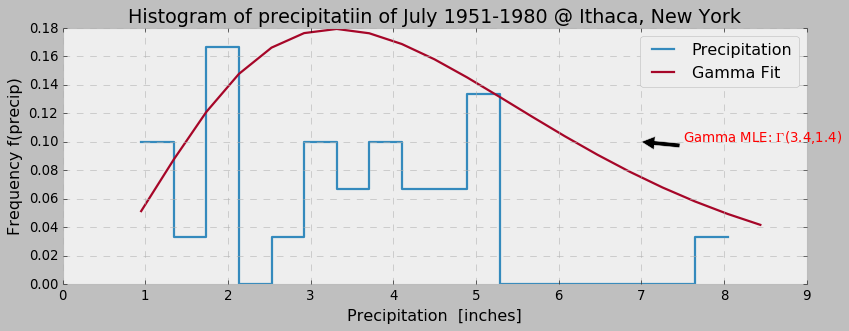

In [238]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
from scipy.stats import norm
from scipy import special
import numpy as np


# Ithaca July precipitation data from Wilks, Newyork, 1951-1980 (inches)
data_series = np.array([4.17,5.61,3.88,1.55,2.30,5.58,5.58,5.14,4.52,1.53,4.24,1.18,3.17,
        4.72,2.17,2.17,3.94,0.95,1.48,5.68,4.25,3.66,2.12,1.24,3.64,8.44,5.20,2.33,2.18,3.43])
years = np.arange(1951,1981,1)

print('Raw Data:', data_series)

bins= np.linspace(min(data_series),max(data_series),20)
#bins= np.linspace(0.9,8.5,20)

print('Binned',bins)
data=data_series
counts, edges = np.histogram(data_series,bins)

counts_norm = counts/sum(counts)

mean_x=np.mean(edges)

print('counts: ',counts/sum(counts))
#print('counts.shape()',counts.shape())
print('edges', edges)
print('bins',bins)
#print('edges.shape()',edges.shape())
#print(np.array(data.shape))
print('mean_x',mean_x)

#plt.hist(data_series,bins,histtype='step',normed=True,color='red')
# Nun die Thoms approximation für die alpha, beta Parameter der Gamma-PDF ausrechnen
#Gamma-PDF
# f(x)=(x/beta)^(alpha-1)*exp(-x/beta)/(beta*Gamma(alpha))
# Gamma(alpha) = Integral_0_unendlich (t^(alpha-1)*exp(-t) dt)
# Gamma Wert kann auch aus der Tabelle für jeweilige Alpha entnommen werden
# Gamma(alpha+1)=alpha*Gamma(alpha) - Stirling oder Moivre Formel

# Alpha und Beta Abschätzung aus (Thom 1958) Maximum Likelihood (MLE) Approximation:

# Difference of the natural log of sample mean and the mean of the logs of data.
#Difference of te arithmetic and geometric means
D = np.log(mean_x)-1/20*sum(np.log(edges))
print('Differential Operator aus MLE',D)
# Alpha Schätzer
alpha = (1+np.sqrt(1+4*D/3))/4/D
# Beta Shätzer
beta= mean_x/alpha
print('alpha',alpha)
print('beta',beta)
# Gamma von Alpha
print('Gamma(alpha): ', special.gamma(alpha))

# Gamma(x) PDF
data_norm_beta = edges/beta

#data_norm_alpha = (data_norm_beta.copy())
#print('data_norm_beta: ',data_norm_beta)

#for i in range(30):
#    print('(data_norm_beta[i])', (data_norm_beta[i])**2)
#print('data_norm_alpha: ',data_norm_alpha)
Gamma_pdf=data_norm_beta**(alpha-1)*np.exp(-data_norm_beta)/beta/special.gamma(alpha)
print('Gamma_pdf: ',Gamma_pdf)
print('Norm Gamma_PDF:',sum(Gamma_pdf))
#plt.plot(edges,counts)

# Aus https://im-coder.com/wie-kann-ich-fit-einer-gauss-kurve-in-python.html
#mean,std=norm.fit(data)
#norm.fit versucht, passen Sie die Parameter einer Normalverteilung basierend auf den Daten.
#Und zwar in dem Beispiel oben mean etwa 2 und std ist etwa 5.

#Um die Handlung, die Sie tun können:
with plt.style.context('bmh'):
  
    fig, ax = plt.subplots(figsize=(12,4))
    ax.set(title="Histogram of precipitatiin of July 1951-1980 @ Ithaca, New York",
          ylabel='Frequency f(precip)',xlabel='Precipitation  [inches]')
    
    plt.plot(bins[0:19],counts_norm,linestyle='steps')
 
    plt.plot(bins,Gamma_pdf)
    plt.legend(['Precipitation','Gamma Fit'])
    # Beschriftung hinzufügen
    #style = dict(size=10, color='gray')
    #ax.text(6,0.15,r"$\Gamma$("+f"{alpha:.2}"+","+f"{beta:.2})")
    ax.annotate('Gamma MLE: '+r"$\Gamma$("+f"{alpha:.2}"+","+f"{beta:.2})",xy=(7,0.1), xytext= (7.5,0.1),arrowprops=dict(facecolor='black',shrink=20),color="red")
    #ax.text(25.5,0.4,r"$\sigma: $"+f"{std:.2}")
    #str()
    #plt.show()

Text(0.5,0,'w=f(x,y)')

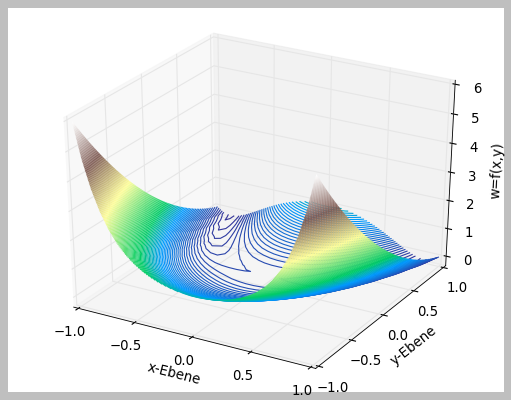

In [236]:
from mpl_toolkits import mplot3d

def f(x,y):
    return (y-x**4)*(y-2*x**2)
x = np.linspace(-1,1,30)
y = np.linspace(-1,1,30)
X, Y = np.meshgrid(x,y)
Z=f(X,Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,Z,200,cmap='terrain')
#ax.plot_surface(X,Y,Z,rstride=1,
                #cstride=1,cmap='viridis',
              # edgecolor='none')
ax.set_xlabel('x-Ebene')
ax.set_ylabel('y-Ebene')
ax.set_zlabel('w=f(x,y)')



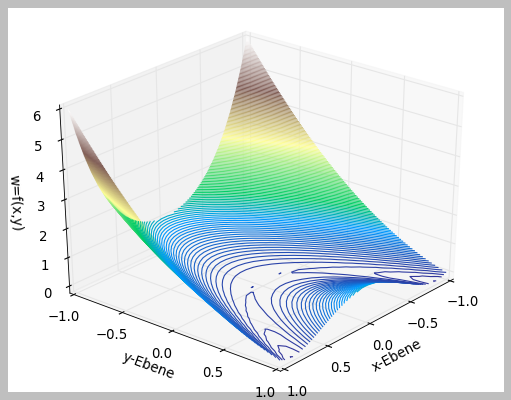

In [233]:
ax.view_init(30,40)
fig